In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing Clustering Lib

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [4]:
# for dendrogram

import scipy.cluster.hierarchy as sch

In [5]:
# for Validation 

from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import calinski_harabasz_score as chs

In [6]:
# Normalization of data In UnSupervised ML is critical
from sklearn.preprocessing import normalize

## Normalization of Data 

In [7]:
air = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [8]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [10]:
len(air['ID#'].unique())

3999

In [11]:
air.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)

In [12]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
# Normalized data frame (considering the numerical part of data)
air_df = air.drop('ID',axis=1)

In [14]:
array = normalize(air_df)

normal_air = pd.DataFrame(array,columns=air_df.columns)
normal_air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


## Hierarchical Clustering

### Dendrogram - Visualization of clusters

In [ ]:
plt.figure(figsize=(20,7))
dendrogram_hc = sch.dendrogram(sch.linkage(normal_air,method='average'))

In [ ]:
plt.figure(figsize=(20,7))
dendrogram_complete = sch.dendrogram(sch.linkage(normal_air,method='complete'))

### Model - Clustering

In [15]:
# form of Hierarchical Clustering
hc_model = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [16]:
# predicting clusters for each point
hc_cluster = hc_model.fit_predict(normal_air)

In [17]:
# clusters are as follows
hc_cluster

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
#creating copy of data
air_hc = air

In [19]:
air_hc['Cluster_no']=hc_cluster

In [20]:
air_hc.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_no
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [21]:
air_hc['Cluster_no'].value_counts()

1    3086
3     509
0     267
2     137
Name: Cluster_no, dtype: int64

### Validation - Finding the Optimal Number of Clusters

In [22]:
no_clusters = [2,3,4,5,6,7,8]

sil_score = []

for i in no_clusters:
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
    hc_cluster=hc.fit_predict(normal_air)
    sil_score.append(sil(normal_air,hc_cluster))

Text(0.5, 1.0, 'Silhouette Score for Hierarchical Clustering')

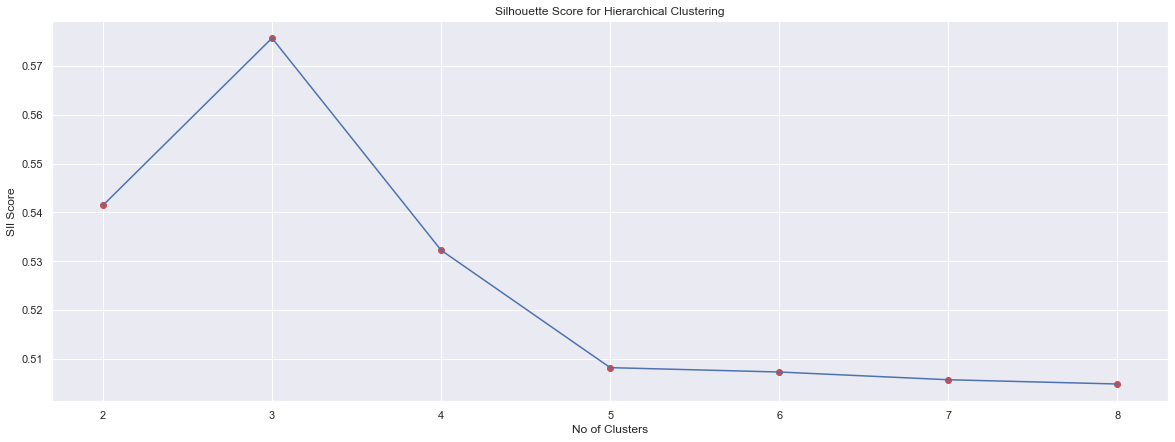

In [23]:
#ploting for Silhouette score 

plt.figure(figsize=(20,7))
plt.plot(no_clusters,sil_score)
plt.scatter(no_clusters,sil_score,color='r')

plt.xlabel('No of Clusters')
plt.ylabel('SIl Score')
plt.title('Silhouette Score for Hierarchical Clustering')

In [ ]:
# According to Silhouette Score - Optimal Clusters = 3 (max Score)

### Improving Model

In [24]:
hc_new = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

hc_cluster_new = hc_new.fit_predict(normal_air)

In [25]:
air_new_hc = air

In [26]:
air_new_hc['Cluster_no']=hc_cluster_new

In [27]:
air_new_hc.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_no
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [28]:
air_new_hc['Cluster_no'].value_counts()

1    3086
0     646
2     267
Name: Cluster_no, dtype: int64

In [29]:
air_new_hc.groupby('Cluster_no')['Balance'].mean()

Cluster_no
0    42612.812693
1    85958.186325
2     5756.063670
Name: Balance, dtype: float64

## KMeans

In [30]:
# creating a kmeans Model

km_model = KMeans(n_clusters=3,max_iter=100)

km_cluster = km_model.fit_predict(normal_air)

In [31]:
km_cluster

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
km_model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# creating copy
air_km = air

In [34]:
air_km['Cluster_no']=km_cluster

In [35]:
air_km.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_no
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [36]:
air_km['Cluster_no'].value_counts()

0    2938
1     815
2     246
Name: Cluster_no, dtype: int64

In [37]:
#inertia 

km_model.inertia_

173.27025625511416

### Validation - Finding the Optimal Number of Clusters

In [38]:
no_clusters = [2,3,4,5,6,7,8]

inertia = []

for i in no_clusters:
    
    km = KMeans(n_clusters=i)
    km_cluster = km.fit_predict(normal_air)
    y=km.inertia_
    inertia.append(y)

Text(0.5, 1.0, 'Inertia Score for KMeans Clustering')

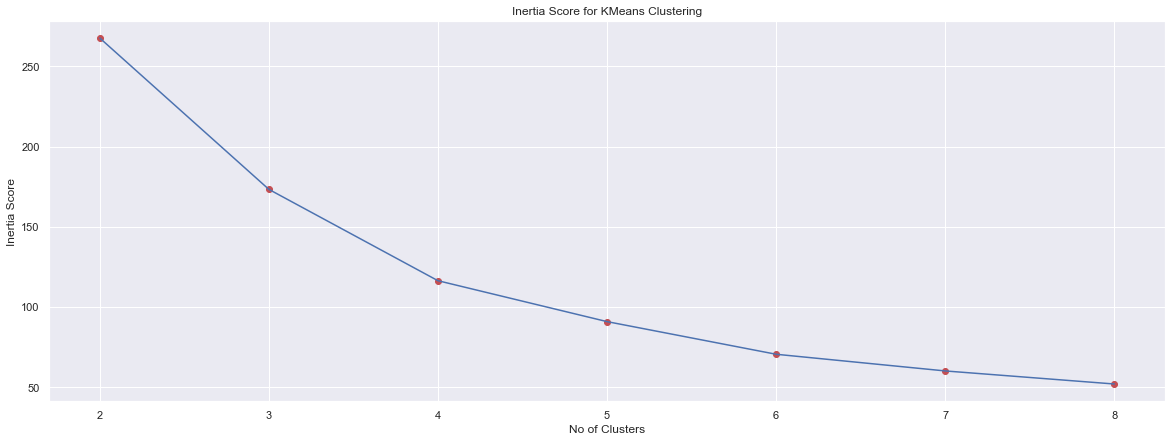

In [39]:
#ploting for Inertia score 

plt.figure(figsize=(20,7))
plt.plot(no_clusters,inertia)
plt.scatter(no_clusters,inertia,color='r')

plt.xlabel('No of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Score for KMeans Clustering')

In [ ]:
# from Inertia, optimal clusters = 3
# rapid change at 3

## DBSCAN 

In [40]:
# creating a DBSCAN Model
dbs_model = DBSCAN(eps=0.3,min_samples=3)

dbs_cluster = dbs_model.fit_predict(normal_air)

In [41]:
# creating the clusters
dbs_cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
# copy
air_dbs = air

In [43]:
air_dbs['Cluster_no'] = dbs_cluster

In [44]:
air_dbs['Cluster_no'].value_counts()

 0    3998
-1       1
Name: Cluster_no, dtype: int64

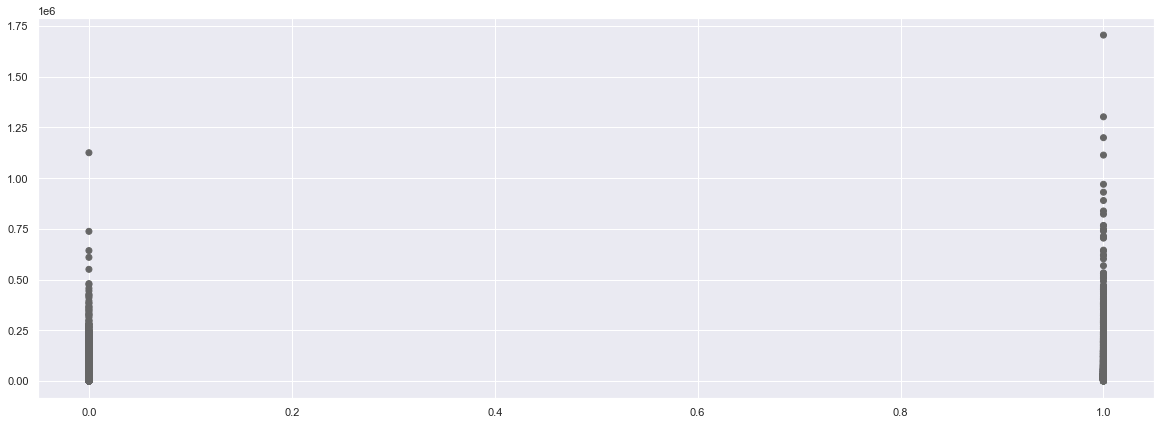

In [45]:
plt.figure(figsize=(20,7))
plt.scatter(air_dbs['Award'],air_dbs['Balance'],c=dbs_cluster,cmap=plt.cm.Accent)